# 5 矩阵和通用函数
2017-08-02 王斌 

本章涵盖以下内容:
 矩阵创建;
 矩阵运算;
 基本通用函数;
 三角函数;
 位运算函数;
 比较函数。

**创建矩阵:**

A = np.mat('1 2 3; 4 5 6; 7 8 9') #使用字符串创建矩阵

A = np.mat(np.arange(9).reshape(3, 3)) '使用NumPy数组进行创建'


np.bmat("A B; A B")	# 从矩阵合并创建新矩阵


result = np.zeros_like(a)	#创建零矩阵

result.flat = 42	#将矩阵填充为某个值，如42



def func_add(a,b):

    return np.add(a,b)

ufunc = np.frompyfunc(func_add, 2, 1)	#使用 frompyfunc 创建通用函数

ufunc(A,A*2)


**函数的通用方法：**

** reduce accumulate  reduceat  outer **

a=np.arange(10)

np.add.reduce(a) == 45 #对于 add 函数,其对数组的reduce计算结果等价于对数组元素求和

np.add.accumulate(a) #accumulate类似于reduce，只不过将中间每一步的结果都输出 得到：array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

np.add.reduceat(a,[0, 5, 2, 7]) #reduceat 按索引进行叠加，方法需要输入一个数组以及一个索引值列表作为参数,相对不是很常用。== array([10,  5, 20, 24])

np.add.outer(a, a)  #outer 看做是矩阵的卷积，分别在各个维度进行叠加，方法返回一个数组,它的秩(rank)等于两个输入数组的秩的和。有点类似卷积。



**常见矩阵操作：**

A.T	'矩阵转置'

A.I	'逆矩阵'


矩阵除法： divide true_divide 和 /

np.true_divide(a, b)==np.divide(a, b) == a/b

矩阵整除法：floor_divide 和 // （截断浮点数）

a//b==np.floor_divide(a, b)

类似的加减乘法：

’+ ==add 

‘- ==subtract

’* ==multiply

% ==mod ==remainder  求模（求余）函数

b%2 ==np.mod(a,2) ==np.remainder(a,2)

fmod == mod * sign, 类似mod的带符号求模fmod 函数（求模结果是带符号，由被除数a的符号决定）

位操作：
x ^ y 异或（XOR）

x & y 与

x | y 或



In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## 5.1 矩阵
在NumPy中,矩阵是 ndarray 的子类,可以由专用的字符串格式来创建。与数学概念中的矩
阵一样,NumPy中的矩阵也是二维的。如你所料,矩阵的乘法运算和NumPy中的普通乘法运算不
同。幂运算当然也不一样。我们可以使用 mat 、 matrix 以及 bmat 函数来创建矩阵。

mat 函数创建矩阵时,若输入已为 matrix 或 ndarray 对象,则不会为它们创建副本。 因此,调用 mat 函数和调用 matrix(data, copy=False) 等价。 我们还将展示矩阵转置和矩阵求逆的方法。

(1) 在创建矩阵的专用字符串中,矩阵的行与行之间用分号隔开,行内的元素之间用空格隔
开。使用如下的字符串调用 mat 函数创建矩阵。使用 mat 函数创建了矩阵,用 T 属性获取了转置矩阵,用 I 属性获取了逆矩阵。

In [2]:
A = np.mat('1 2 3; 4 5 6; 7 8 9')
A
'矩阵转置'
A.T
'逆矩阵'
A.I
'使用NumPy数组进行创建'
np.mat(np.arange(9).reshape(3, 3))

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

'矩阵转置'

matrix([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])

'逆矩阵'

matrix([[ -4.50359963e+15,   9.00719925e+15,  -4.50359963e+15],
        [  9.00719925e+15,  -1.80143985e+16,   9.00719925e+15],
        [ -4.50359963e+15,   9.00719925e+15,  -4.50359963e+15]])

'使用NumPy数组进行创建'

matrix([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

## 5.3 从已有矩阵创建新矩阵
希望利用一些已有的较小的矩阵来创建一个新的大矩阵。这可以用 bmat 函
数来实现。这里的 b 表示“分块”, bmat 即分块矩阵(block matrix)。

我们将利用两个较小的矩阵创建一个新的矩阵,步骤如下。

(1) 首先,创建一个2×2的单位矩阵:

(2) 使用字符串创建复合矩阵,该字符串的格式与 mat 函数中一致



In [3]:
'创建A,B矩阵'
A=np.eye(2)
A
B=A*2
B

'合并矩阵'
np.bmat("A B; A B")

'创建A,B矩阵'

array([[ 1.,  0.],
       [ 0.,  1.]])

array([[ 2.,  0.],
       [ 0.,  2.]])

'合并矩阵'

matrix([[ 1.,  0.,  2.,  0.],
        [ 0.,  1.,  0.,  2.],
        [ 1.,  0.,  2.,  0.],
        [ 0.,  1.,  0.,  2.]])

## 5.5 通用函数

我们可以使用NumPy中的 frompyfunc 函数,通过一个Python函数来创建通用函数。

(1) 定义一个回答宇宙、生命及万物的终极问题的Python函数

(2) 使用 zeros_like 函数创建一个和 a 形状相同,并且元素全部为0的数组 result

(3) 现在,我们将刚刚生成的数组中的所有元素设置为“终极答案”其值为42,并返回这个
结果。

(4) 使用 frompyfunc 创建通用函数。指定输入参数的个数为1,随后的1为输出参数的个数

In [4]:
def ultimate_answer(a):
    print('#',a)
    result = np.zeros_like(a)
    result.flat = 42
    return result

ufunc = np.frompyfunc(ultimate_answer, 1, 1)
ufunc(np.arange(4))
ufunc(np.arange(4).reshape(2, 2))


#不知道为什么frompyfunc中的数据是一个个元素，直接用函数就可以是整个矩阵。
ultimate_answer(np.arange(4))
ultimate_answer(np.arange(4).reshape(2, 2))

# 0
# 1
# 2
# 3


array([array(42), array(42), array(42), array(42)], dtype=object)

# 0
# 1
# 2
# 3


array([[array(42), array(42)],
       [array(42), array(42)]], dtype=object)

# [0 1 2 3]


array([42, 42, 42, 42])

# [[0 1]
 [2 3]]


array([[42, 42],
       [42, 42]])

## 5.7 通用函数的方法
函数竟然也可以拥有方法?如前所述,其实通用函数并非真正的函数,而是能够表示函数的对象。通用函数有四个方法,不过这些方法只对输入两个参数、输出一个参数的ufunc对象有效,
例如 add 函数。其他不符合条件的ufunc对象调用这些方法时将抛出 ValueError 异常。因此只能
在二元通用函数上调用这些方法。以下将逐一介绍这4个方法:
 reduce
 accumulate
 reduceat
 outer

### 在 add 上调用通用函数的方法

(1) 沿着指定的轴,在连续的数组元素之间递归调用通用函数,即可得到输入数组的规约
(reduce)计算结果。对于 add 函数,其对数组的reduce计算结果等价于对数组元素求和。调用
reduce 方法

(2) accumulate 方法同样可以递归作用于输入数组。但是与 reduce 方法不同的是,它将存
储运算的中间结果并返回。因此在 add 函数上调用 accumulate 方法,等价于直接调用 cumsum 函
数。


In [5]:
a=np.arange(10)
a
np.add.reduce(a)
np.add.accumulate(a)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

45

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

(3)reduceat 方法需要输入一个数组以及一个索引值列表作为参数。第一步用到索引值列表中的0和5,实际上就是对数组中索引值在0到5之间的元素进行reduce操作。


In [6]:
np.add.reduceat(a,[0, 5, 2, 7])
'第一步用到索引值列表中的0和5,实际上就是对数组中索引值在0到5之间的元素进行reduce操作'
np.add.reduce(a[0:5])
'第二步用到索引值5和2。由于2比5小,所以直接返回索引值为5的元素'
a[5]
'第三步用到索引值2和7。这一步是对索引值在2到7之间的数组元素进行reduce操作'
np.add.reduce(a[2:7])
'第四步用到索引值7。这一步是对索引值从7开始直到数组末端的元素进行reduce操作'
np.add.reduce(a[7:])

array([10,  5, 20, 24])

'第一步用到索引值列表中的0和5,实际上就是对数组中索引值在0到5之间的元素进行reduce操作'

10

'第二步用到索引值5和2。由于2比5小,所以直接返回索引值为5的元素'

5

'第三步用到索引值2和7。这一步是对索引值在2到7之间的数组元素进行reduce操作'

20

'第四步用到索引值7。这一步是对索引值从7开始直到数组末端的元素进行reduce操作'

24

(4) outer 方法返回一个数组,它的秩(rank)等于两个输入数组的秩的和。有点类似卷积。

In [7]:
np.add.outer(a, a)


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]])

## 5.9 算术运算
在NumPy中,基本算术运算符+、-和 * 隐式关联着通用函数 add 、 subtract 和 multiply 。
也就是说,当你对NumPy数组使用这些算术运算符时,对应的通用函数将自动被调用。除法包含
的 过 程 则 较 为 复 杂 , 在 数 组 的 除 法 运 算 中 涉 及 三 个 通 用 函 数 divide 、 true_divide 和
floor_division ,以及两个对应的运算符 / 和 //

让我们在实践中了解数组的除法运算。

(1) divide 和true_divide 和 /

对于python2， 函数在整数和浮点数除法中均只保留整数部分

在python3中，都是有浮点，相当于python2中的true_divide()

In [8]:
a = np.array([2, 6, 5])
b = np.array([1, 2, 3])
a
b
np.divide(a, b)
np.divide(b, a)

np.true_divide(a, b)==np.divide(a, b)
np.true_divide(b,a)==np.divide(b, a)

a/b == np.divide(a, b)
b/a == np.divide(b, a)

array([2, 6, 5])

array([1, 2, 3])

array([ 2.        ,  3.        ,  1.66666667])

array([ 0.5       ,  0.33333333,  0.6       ])

array([ True,  True,  True], dtype=bool)

array([ True,  True,  True], dtype=bool)

array([ True,  True,  True], dtype=bool)

array([ True,  True,  True], dtype=bool)

(2) floor_divide 和 //

函数总是返回整数结果,相当于先调用 divide 函数再调用 floor 函数。floor 函数将对浮点数进行向下取整并返回整数.相当于截断浮点数部分。



In [9]:
a
b

np.floor_divide(a, b)
np.floor_divide(b, a)

a//b==np.floor_divide(a, b)
b//a==np.floor_divide(b, a)

array([2, 6, 5])

array([1, 2, 3])

array([2, 3, 1])

array([0, 0, 0])

array([ True,  True,  True], dtype=bool)

array([ True,  True,  True], dtype=bool)

## 5.11 模运算

计算模数或者余数,可以使用NumPy中的 mod 、 remainder 和 fmod 函数。当然,也可以使
用 % 运算符。这些函数的主要差异在于处理负数的方式。 fmod 函数在这方面异于其他函数

(1) remainder 求余数函数逐个返回两个数组中元素相除后的余数。如果第二个数字为0,则直接
返回0

(2) mod 函数与 remainder 函数的功能完全一致



In [10]:
a
'求余数remainder mod %'
np.remainder(a,2)
np.mod(a,2)
a%2

array([2, 6, 5])

'求余数remainder mod %'

array([0, 0, 1])

array([0, 0, 1])

array([0, 0, 1])

(4) fmod 函数处理负数的方式与 remainder 、 mod 和 % 不同。所得余数的正负由被除数决定

In [11]:
b=np.arange(-3,3)
b
b%2
np.fmod(b,2)

array([-3, -2, -1,  0,  1,  2])

array([1, 0, 1, 0, 1, 0])

array([-1,  0, -1,  0,  1,  0])

## 5.13 斐波那契数列

斐波那契(Fibonacci)数列是基于递推关系生成的。直接用NumPy代码来解释递推关系是比
较麻烦的,不过我们可以用矩阵的形式或者黄金分割公式来解释它。因此,我们将介绍 matrix
和 rint 函数。使用 matrix 函数创建矩阵, rint 函数对浮点数取整,但结果仍为浮点数类型。

斐波那契数列的递推关系可以用矩阵来表示。斐波那契数列的计算等价于矩阵的连乘。

(1) 创建斐波那契矩阵:



In [12]:
F = np.matrix([[1, 1], [1, 0]])
F
F2=np.mat([[1, 1], [1, 0]])
np.array_equal(F,F2)

matrix([[1, 1],
        [1, 0]])

True

(2) 计算斐波那契数列中的第8个数,即矩阵的幂为8减去1。计算出的斐波那契数位于矩阵的
对角线上

In [13]:
F
F**2
F**3
(F ** 7)[0, 0]

matrix([[1, 1],
        [1, 0]])

matrix([[2, 1],
        [1, 1]])

matrix([[3, 2],
        [2, 1]])

21

(3) 利用黄金分割公式或通常所说的比奈公式(Binet’ s Formula),加上取整函数,就可以直
接计算斐波那契数。计算前8个斐波那契数

In [14]:
n = np.arange(1, 9)
sqrt5 = np.sqrt(5)
phi = (1 + sqrt5)/2
fibonacci = np.rint((phi**n - (-1/phi)**n)/sqrt5)
fibonacci

'注意其中的rint是四舍五入，等价于round,但int是直接去掉浮点数'
np.rint(0.51)
np.round(0.51)
np.round(np.linspace(1,2,5)) == np.rint(np.linspace(1,2,5))
np.int(0.51)

array([  1.,   1.,   2.,   3.,   5.,   8.,  13.,  21.])

'注意其中的rint是四舍五入，等价于round,但int是直接去掉浮点数'

1.0

1.0

array([ True,  True,  True,  True,  True], dtype=bool)

0

## 5.15 利萨茹曲线
在NumPy中,所有的标准三角函数如sin、cos、tan等均有对应的通用函数。利萨茹曲线
(Lissajous curve)是一种很有趣的使用三角函数的方式。我至今仍记得在物理实验室的示波器上
显示出利萨茹曲线时的情景。利萨茹曲线由以下参数方程定义

x = A sin(at + n/2)

y = B sin(bt)

利萨茹曲线的参数包括 A 、 B 、 a 和 b 。为简单起见,我们令 A 和 B 均为1。

(1) 使用 linspace 函数初始化变量 t ,即从 -pi 到 pi 上均匀分布的 201 个点

In [15]:
a = 9
b = 8
t = np.linspace(-np.pi, np.pi, 201)

(2) 使用 sin 函数和NumPy常量 pi 计算变量 x

(3) 使用 sin 函数计算变量 y :

In [16]:
x = np.sin(a * t + np.pi/2)
y = np.sin(b * t)


画图

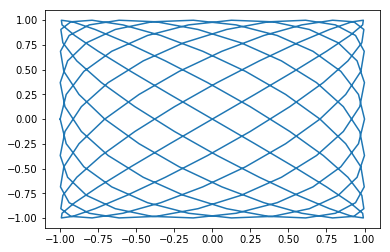

In [17]:
plt.plot(x,y)

## 5.17 方波
方波也是一种可以在示波器上显示的波形。方波可以近似表示为多个正弦波的叠加。事实上,
任意一个方波信号都可以用无穷傅里叶级数来表示


(1)初始化

In [18]:
k=np.arange(1,99)
t = np.linspace(-np.pi, np.pi, 201)
k=k*2-1
f=np.zeros_like(t)

(2) 接下来,直接使用 sin 和 sum 函数进行计算

In [19]:
for i in range(len(t)):
    f[i] = np.sum(np.sin(k * t[i])/k)
# f = (10 / np.pi) * f

画图，用sin合成了一个方波

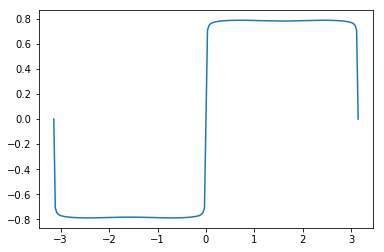

In [20]:
plt.plot(t, f)
plt.show()

## 5.19 锯齿波和三角波

在示波器上,锯齿波和三角波也是常见的波形。和方波类似,我们也可以将它们表示成无穷
傅里叶级数。对锯齿波取绝对值即可得到三角波。

(1)初始化

In [21]:
k=np.arange(1,99)
k=k*np.pi
t = np.linspace(-np.pi, np.pi, 201)
f=np.zeros_like(t)

(2)同样,直接使用 sin 和 sum 函数进行计算: 

In [22]:
for i in range(len(t)):
    f[i] = np.sum(-2*np.sin(2*k * t[i])/k)
# f = (10 / np.pi) * f

画图，用sin合成了一个方波

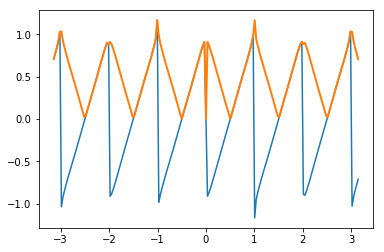

In [23]:
plt.plot(t, f)
plt.plot(t, np.abs(f), lw=2.0)
plt.show()

## 5.21 位操作函数和比较函数
位操作函数可以在整数或整数数组的位上进行操作,它们都是通用函数。 ^ 、 & 、 | 、 << 、 >>
等位操作符在NumPy中也有对应的部分, < 、 > 、 == 等比较运算符也是如此。有了这些操作符,
你可以在代码中玩一些高级技巧以提升代码的性能。不过,它们会使代码变得难以理解,因此需
谨慎使用。

### 玩转二进制位
我们将学习三个小技巧——检查两个整数的符号是否一致,检查一个数是否为2的幂数,以
及计算一个数被2的幂数整除后的余数。我们会分别展示两种方法,即使用位操作符和使用相应
的NumPy函数。

(1) 第一个小技巧需要用 XOR 或者 ^ 操作符。 XOR 操作符又被称为不等运算符,因此当两个操
作数的符号不一致时, XOR 操作的结果为负数。在NumPy中, ^ 操作符对应于 bitwise_xor 函数,
< 操作符对应于 less 函数

In [24]:
x = np.arange(-9, 9)
y = -x
x
y
"Sign different?"
(x ^ y) < 0
x ^ y
x & y
x | y
"Sign different?"
np.less(np.bitwise_xor(x, y), 0)

array([-9, -8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,
        8])

array([ 9,  8,  7,  6,  5,  4,  3,  2,  1,  0, -1, -2, -3, -4, -5, -6, -7,
       -8])

'Sign different?'

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

array([ -2, -16,  -2,  -4,  -2,  -8,  -2,  -4,  -2,   0,  -2,  -4,  -2,
        -8,  -2,  -4,  -2, -16])

array([1, 8, 1, 2, 1, 4, 1, 2, 1, 0, 1, 2, 1, 4, 1, 2, 1, 8])

array([-1, -8, -1, -2, -1, -4, -1, -2, -1,  0, -1, -2, -1, -4, -1, -2, -1,
       -8])

'Sign different?'

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [25]:
1

1